# Import Dependencies

In [2]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [3]:
import gdown
import shutil
from sklearn.model_selection import train_test_split

# Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Check GPU

In [ ]:
!nvidia-smi

Mon Oct 11 05:01:43 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.74       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P8    32W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Image Rename (DON'T NEED TO RUN)

In [ ]:
i = 1
for name in os.listdir('/content/gdrive/MyDrive/CSC340 AI/Datasets/Mature'):
  new_name = 'mature_'+str(i).zfill(4)+'.'+name.split('.')[len(name.split('.'))-1]
  i+=1
  shutil.move('/content/gdrive/MyDrive/CSC340 AI/Datasets/Mature/'+name,'/content/gdrive/MyDrive/CSC340 AI/Datasets/Mature/'+new_name)
i = 1
for name in os.listdir('/content/gdrive/MyDrive/CSC340 AI/Datasets/Partially Mature'):
  new_name = 'partiallymature_'+str(i).zfill(4)+'.'+name.split('.')[len(name.split('.'))-1]
  i+=1
  shutil.move('/content/gdrive/MyDrive/CSC340 AI/Datasets/Partially Mature/'+name,'/content/gdrive/MyDrive/CSC340 AI/Datasets/Partially Mature/'+new_name)
i = 1
for name in os.listdir('/content/gdrive/MyDrive/CSC340 AI/Datasets/Unmature'):
  new_name = 'unmature_'+str(i).zfill(4)+'.'+name.split('.')[len(name.split('.'))-1]
  i+=1
  shutil.move('/content/gdrive/MyDrive/CSC340 AI/Datasets/Unmature/'+name,'/content/gdrive/MyDrive/CSC340 AI/Datasets/Unmature/'+new_name)

## Image Augmentation (DON'T NEED TO RUN)

In [ ]:
import tensorflow.keras.layers.experimental.preprocessing as prep
data_gen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=60,
      horizontal_flip=True,
      vertical_flip=True,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.1,
      zoom_range=0.2,
      fill_mode='nearest')

In [ ]:
base='/content/gdrive/MyDrive/CSC340 AI/Datasets'
def augmented_img(path):
  count = 0
  filelist = os.listdir(base+'/'+path)
  max = len(filelist)
  print(max, filelist)
  for i in filelist:
    img = plt.imread(base+'/'+path+'/'+i,0)
    img = tf.expand_dims(img, 0)
    data_gen.fit(img)
    extension = i.split('.')
    extension = extension[len(extension)-1]
    for x, val in zip(data_gen.flow(img,save_to_dir=base+'/'+path,save_prefix='aug',save_format=extension),range(10)):pass
    count+=1
    print(path+': '+str(count)+'/'+str(max))

In [ ]:
augmented_img('Mature')
augmented_img('Partially Mature')
augmented_img('Unmature')

# Import Datasets

## Mini Dataset

### Define directory path

In [ ]:
root_dir = './'

In [ ]:
mini_base_dir = os.path.join(root_dir,'papaya_image')
mini_raw_mature_dir = os.path.join(mini_base_dir,'mature')
mini_raw_partially_dir = os.path.join(mini_base_dir,'partiallymature')
mini_raw_unmature_dir = os.path.join(mini_base_dir,'unmature')

In [ ]:
mini_train_dir = os.path.join(mini_base_dir,'train')
mini_train_mature_dir = os.path.join(mini_train_dir,'Mature')
mini_train_partially_mature_dir = os.path.join(mini_train_dir,'Partially Mature')
mini_train_unmature_dir = os.path.join(mini_train_dir,'Unmature')

In [ ]:
mini_validate_dir = os.path.join(mini_base_dir,'validate')
mini_validate_mature_dir = os.path.join(mini_validate_dir,'Mature')
mini_validate_partially_mature_dir = os.path.join(mini_validate_dir,'Partially Mature')
mini_validate_unmature_dir = os.path.join(mini_validate_dir,'Unmature')

In [ ]:
mini_test_dir = os.path.join(mini_base_dir,'test')
mini_test_mature_dir = os.path.join(mini_test_dir,'Mature')
mini_test_partially_mature_dir = os.path.join(mini_test_dir,'Partially Mature')
mini_test_unmature_dir = os.path.join(mini_test_dir,'Unmature')

### Create directory for train and validate

In [ ]:
os.mkdir(mini_train_dir)
os.mkdir(mini_train_mature_dir)
os.mkdir(mini_train_partially_mature_dir)
os.mkdir(mini_train_unmature_dir)
os.mkdir(mini_validate_dir)
os.mkdir(mini_validate_mature_dir)
os.mkdir(mini_validate_partially_mature_dir)
os.mkdir(mini_validate_unmature_dir)
os.mkdir(mini_test_dir)
os.mkdir(mini_test_mature_dir)
os.mkdir(mini_test_partially_mature_dir)
os.mkdir(mini_test_unmature_dir)

### Train and validate split and copy file to target directory

In [ ]:
train_mature_df = pd.read_csv('data_mini/mini_mature_train_df.csv')
train_partially_mature_df = pd.read_csv('data_mini/mini_partially_mature_train_df.csv')
train_unmature_df = pd.read_csv('data_mini/mini_unmature_train_df.csv')
test_mature_df = pd.read_csv('data_mini/mini_mature_test_df.csv')
test_partially_mature_df = pd.read_csv('data_mini/mini_partially_mature_test_df.csv')
test_unmature_df = pd.read_csv('data_mini/mini_unmature_test_df.csv')

In [ ]:
train_size = 0.75

In [ ]:
mature_train_df, mature_validate_df = train_test_split(train_mature_df,train_size=train_size,random_state=42)
partially_mature_train_df, partially_mature_validate_df = train_test_split(train_partially_mature_df,train_size=train_size,random_state=42)
unmature_train_df, unmature_validate_df = train_test_split(train_unmature_df,train_size=train_size,random_state=42)

In [ ]:
mature_train_df

In [ ]:
for file in mature_train_df.itertuples():
  shutil.copyfile(os.path.join(mini_raw_mature_dir,file[1]),os.path.join(mini_train_mature_dir,file[1]))
for file in partially_mature_train_df.itertuples():
  shutil.copyfile(os.path.join(mini_raw_partially_dir,file[1]),os.path.join(mini_train_partially_mature_dir,file[1]))
for file in unmature_train_df.itertuples():
  shutil.copyfile(os.path.join(mini_raw_unmature_dir,file[1]),os.path.join(mini_train_unmature_dir,file[1]))
for file in mature_validate_df.itertuples():
  shutil.copyfile(os.path.join(mini_raw_mature_dir,file[1]),os.path.join(mini_validate_mature_dir,file[1]))
for file in partially_mature_validate_df.itertuples():
  shutil.copyfile(os.path.join(mini_raw_partially_dir,file[1]),os.path.join(mini_validate_partially_mature_dir,file[1]))
for file in unmature_validate_df.itertuples():
  shutil.copyfile(os.path.join(mini_raw_unmature_dir,file[1]),os.path.join(mini_validate_unmature_dir,file[1]))
for file in test_mature_df.itertuples():
  shutil.copyfile(os.path.join(mini_raw_mature_dir,file[1]),os.path.join(mini_test_mature_dir,file[1]))
for file in test_partially_mature_df.itertuples():
  shutil.copyfile(os.path.join(mini_raw_partially_dir,file[1]),os.path.join(mini_test_partially_mature_dir,file[1]))
for file in test_unmature_df.itertuples():
  shutil.copyfile(os.path.join(mini_raw_unmature_dir,file[1]),os.path.join(mini_test_unmature_dir,file[1]))

### Download Mini Dataset from Google Drive

In [ ]:
url = "https://drive.google.com/uc?id=1VG0jyj46ZAiW1Z3JhFzju40ctufH4bzl"
output = "papaya_image_mini.zip"
gdown.download(url,output,quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1VG0jyj46ZAiW1Z3JhFzju40ctufH4bzl
To: /content/papaya_image_mini.zip
100%|██████████| 155M/155M [00:00<00:00, 162MB/s]


'papaya_image_mini.zip'

In [ ]:
url = "https://drive.google.com/uc?id=1g-8CN80RXJ7dncNwO56gEizkQDrLWe24"
output = "data_mini.zip"
gdown.download(url,output,quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1g-8CN80RXJ7dncNwO56gEizkQDrLWe24
To: /content/data_mini.zip
100%|██████████| 2.50k/2.50k [00:00<00:00, 3.32MB/s]


'data_mini.zip'

In [ ]:
!unzip papaya_image_mini.zip
!unzip data_mini.zip

unzip:  cannot find or open papaya_image_mini.zip, papaya_image_mini.zip.zip or papaya_image_mini.zip.ZIP.
Archive:  data_mini.zip
  inflating: data_mini/mini_mature_train_df.csv  
  inflating: data_mini/mini_partially_mature_test_df.csv  
  inflating: data_mini/mini_partially_mature_train_df.csv  
  inflating: data_mini/mini_unmature_train_df.csv  
  inflating: data_mini/mini_unmature_test_df.csv  
  inflating: data_mini/mini_mature_test_df.csv  


In [ ]:
!rm -rf papaya_image_mini.zip
!rm -rf data_mini.zip

## Download Dataset from Google Drive

In [4]:
url = "https://drive.google.com/uc?id=1bJaxLQIzgUIrMhoh1kJ0UAJqoVQ0K93F"
output = "papaya_image.zip"
gdown.download(url,output,quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1bJaxLQIzgUIrMhoh1kJ0UAJqoVQ0K93F
To: /content/papaya_image.zip
100%|██████████| 1.73G/1.73G [00:09<00:00, 192MB/s]


'papaya_image.zip'

In [5]:
url = "https://drive.google.com/uc?id=1AT1kviM7VlOPM7zf6L25mePoqg2Z3Lnt"
output = "data.zip"
gdown.download(url,output,quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1AT1kviM7VlOPM7zf6L25mePoqg2Z3Lnt
To: /content/data.zip
100%|██████████| 18.7k/18.7k [00:00<00:00, 10.1MB/s]


'data.zip'

In [6]:
!unzip papaya_image.zip
!unzip data.zip

Streaming output truncated to the last 5000 lines.
  inflating: Datasets/Mature/mature_1023.jpg  
  inflating: Datasets/Mature/mature_1024.jpg  
  inflating: Datasets/Mature/mature_1025.jpg  
  inflating: Datasets/Mature/mature_1026.jpg  
  inflating: Datasets/Mature/mature_1027.jpg  
  inflating: Datasets/Mature/mature_1028.jpg  
  inflating: Datasets/Mature/mature_1029.jpg  
  inflating: Datasets/Mature/mature_1030.jpg  
  inflating: Datasets/Mature/mature_1031.jpg  
  inflating: Datasets/Mature/mature_1032.jpg  
  inflating: Datasets/Mature/mature_1033.jpg  
  inflating: Datasets/Mature/mature_1034.jpg  
  inflating: Datasets/Mature/mature_1035.jpg  
  inflating: Datasets/Mature/mature_1036.jpg  
  inflating: Datasets/Mature/mature_1037.jpg  
  inflating: Datasets/Mature/mature_1038.jpg  
  inflating: Datasets/Mature/mature_1039.jpg  
  inflating: Datasets/Mature/mature_1040.jpg  
  inflating: Datasets/Mature/mature_1041.jpg  
  inflating: Datasets/Mature/mature_1042.jpg  
  inflati

In [7]:
!rm -rf papaya_image.zip
!rm -rf data.zip

# Train Validate Split

### Define directory path

In [8]:
root_dir = './'

In [9]:
base_dir = os.path.join(root_dir,'Datasets')
raw_mature_dir = os.path.join(base_dir,'Mature')
raw_partially_dir = os.path.join(base_dir,'Partially Mature')
raw_unmature_dir = os.path.join(base_dir,'Unmature')

In [10]:
train_dir = os.path.join(base_dir,'train')
train_mature_dir = os.path.join(train_dir,'Mature')
train_partially_mature_dir = os.path.join(train_dir,'Partially Mature')
train_unmature_dir = os.path.join(train_dir,'Unmature')

In [11]:
validate_dir = os.path.join(base_dir,'validate')
validate_mature_dir = os.path.join(validate_dir,'Mature')
validate_partially_mature_dir = os.path.join(validate_dir,'Partially Mature')
validate_unmature_dir = os.path.join(validate_dir,'Unmature')

In [12]:
test_dir = os.path.join(base_dir,'test')
test_mature_dir = os.path.join(test_dir,'Mature')
test_partially_mature_dir = os.path.join(test_dir,'Partially Mature')
test_unmature_dir = os.path.join(test_dir,'Unmature')

### Create directory for train and validate

In [13]:
os.mkdir(train_dir)
os.mkdir(train_mature_dir)
os.mkdir(train_partially_mature_dir)
os.mkdir(train_unmature_dir)
os.mkdir(validate_dir)
os.mkdir(validate_mature_dir)
os.mkdir(validate_partially_mature_dir)
os.mkdir(validate_unmature_dir)
os.mkdir(test_dir)
os.mkdir(test_mature_dir)
os.mkdir(test_partially_mature_dir)
os.mkdir(test_unmature_dir)

### Train and validate split and copy file to target directory

In [14]:
train_mature_df = pd.read_csv('data/train_mature_df.csv')
train_partially_mature_df = pd.read_csv('data/train_partially_mature_df.csv')
train_unmature_df = pd.read_csv('data/train_unmature_df.csv')
test_mature_df = pd.read_csv('data/test_mature_df.csv')
test_partially_mature_df = pd.read_csv('data/test_partially_mature_df.csv')
test_unmature_df = pd.read_csv('data/test_unmature_df.csv')

In [15]:
train_size = 0.75

In [16]:
mature_train_df, mature_validate_df = train_test_split(train_mature_df,train_size=train_size,random_state=42)
partially_mature_train_df, partially_mature_validate_df = train_test_split(train_partially_mature_df,train_size=train_size,random_state=42)
unmature_train_df, unmature_validate_df = train_test_split(train_unmature_df,train_size=train_size,random_state=42)

In [17]:
mature_train_df

,filename
819,mature_0564.jpg
1302,mature_1581.png
1040,mature_1487.png
1395,mature_0575.jpg
527,mature_0942.jpg
...,...
1130,mature_1592.png
1294,mature_0721.jpg
860,mature_0410.jpg
1459,mature_0158.png


In [18]:
for file in mature_train_df.itertuples():
  shutil.copyfile(os.path.join(raw_mature_dir,file[1]),os.path.join(train_mature_dir,file[1]))
for file in partially_mature_train_df.itertuples():
  shutil.copyfile(os.path.join(raw_partially_dir,file[1]),os.path.join(train_partially_mature_dir,file[1]))
for file in unmature_train_df.itertuples():
  shutil.copyfile(os.path.join(raw_unmature_dir,file[1]),os.path.join(train_unmature_dir,file[1]))
for file in mature_validate_df.itertuples():
  shutil.copyfile(os.path.join(raw_mature_dir,file[1]),os.path.join(validate_mature_dir,file[1]))
for file in partially_mature_validate_df.itertuples():
  shutil.copyfile(os.path.join(raw_partially_dir,file[1]),os.path.join(validate_partially_mature_dir,file[1]))
for file in unmature_validate_df.itertuples():
  shutil.copyfile(os.path.join(raw_unmature_dir,file[1]),os.path.join(validate_unmature_dir,file[1]))
for file in test_mature_df.itertuples():
  shutil.copyfile(os.path.join(raw_mature_dir,file[1]),os.path.join(test_mature_dir,file[1]))
for file in test_partially_mature_df.itertuples():
  shutil.copyfile(os.path.join(raw_partially_dir,file[1]),os.path.join(test_partially_mature_dir,file[1]))
for file in test_unmature_df.itertuples():
  shutil.copyfile(os.path.join(raw_unmature_dir,file[1]),os.path.join(test_unmature_dir,file[1]))

# Preprocessing

In [19]:
IMAGE_SIZE = 224
model_name = 'model_vgg.h5'

In [20]:
BATCH_SIZE = 64

In [21]:
def showImage(img):
  plt.imshow(img)
  plt.show()

In [ ]:
image_gen_train = ImageDataGenerator(rescale=1./255)

In [ ]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     class_mode="categorical",
                                                     target_size=(IMAGE_SIZE,IMAGE_SIZE))

Found 3600 images belonging to 3 classes.


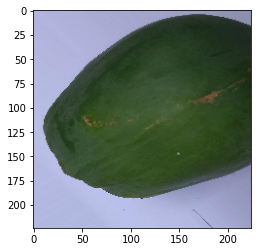

In [ ]:
sample_image = train_data_gen[0][0][0]
showImage(sample_image)

In [ ]:
train_data_gen.class_indices

{'Mature': 0, 'Partially Mature': 1, 'Unmature': 2}

In [ ]:
image_gen_val = ImageDataGenerator(rescale=1./255)

In [ ]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=validate_dir,
                                                 class_mode="categorical",
                                                 target_size=(IMAGE_SIZE, IMAGE_SIZE))

Found 1199 images belonging to 3 classes.


In [ ]:
val_data_gen.class_indices

{'Mature': 0, 'Partially Mature': 1, 'Unmature': 2}

# Model Building

## Construct Model (CNN)

In [ ]:
def getCNNModel():
  global IMAGE_SIZE
  IMAGE_SIZE = 150
  global model_name
  model_name = "model_cnn.h5"
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(256, activation='relu'),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(3, activation='softmax')
  ])
  return model

## Construct Model with Pretrained VGG Model

In [ ]:
def getVGGModel():
  global IMAGE_SIZE
  IMAGE_SIZE = 224
  global model_name
  model_name = "model_vgg.h5"
  from tensorflow.keras.applications import VGG16
  from tensorflow.keras.layers import Flatten,Dense
  from tensorflow.keras import Model
  vgg = VGG16(input_shape=[IMAGE_SIZE,IMAGE_SIZE,3], weights='imagenet', include_top=False)
  x = Flatten()(vgg.output)
  predict = Dense(3, activation='softmax')(x)
  model = Model(inputs=vgg.input, outputs=predict)
  return model

## Construct Model with Pretrained Resnet50 Model

In [ ]:
def getResNetModel():
  global IMAGE_SIZE
  IMAGE_SIZE = 224
  global model_name
  model_name = "model_resnet.h5"
  from tensorflow.keras.applications import ResNet50
  from tensorflow.keras.layers import Flatten,Dense
  from tensorflow.keras import Model
  resnet = ResNet50(input_shape=[IMAGE_SIZE,IMAGE_SIZE,3], weights='imagenet', include_top=False)
  x = Flatten()(resnet.output)
  predict = Dense(3, activation='softmax')(x)
  model = Model(inputs=resnet.input, outputs=predict)
  return model

# Construct Model

In [ ]:
def getModel(model_name):
  if model_name == 'CNN':
    return getCNNModel()
  elif model_name == 'VGG':
    return getVGGModel()
  elif model_name == 'ResNet':
    return getResNetModel()

In [ ]:
model_name = "CNN" #@param ["CNN", "VGG","ResNet"]
model = getModel(model_name)

94781440/94765736 [==============================] - 5s 0us/step


## Compile model & Summary

In [ ]:
# with batch size = 100 -> 5 mins/epoch
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

## Train Model

In [ ]:
total_train = len(mature_train_df) + len(partially_mature_train_df) + len(unmature_train_df)
total_validate = len(mature_validate_df) + len(partially_mature_validate_df) + len(unmature_validate_df)
epochs = 50
patience = 3

In [ ]:
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    model_name, save_best_only=True)
early_stopping = tf.keras.callbacks.EarlyStopping(patience=patience)

In [ ]:
history = model.fit(
    train_data_gen,
    epochs=epochs,
    validation_data=val_data_gen,
    batch_size=32,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4847: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`categorical_crossentropy` received `from_logits=True`, but '


57/57 [==============================] - 291s 4s/step - loss: 1.5909 - accuracy: 0.8575 - val_loss: 71174.3828 - val_accuracy: 0.3069


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/50
57/57 [==============================] - 251s 4s/step - loss: 0.3143 - accuracy: 0.9194 - val_loss: 227.7760 - val_accuracy: 0.3128
Epoch 3/50
57/57 [==============================] - 251s 4s/step - loss: 0.3714 - accuracy: 0.9000 - val_loss: 1.0986 - val_accuracy: 0.3128
Epoch 4/50
57/57 [==============================] - 250s 4s/step - loss: 1.0336 - accuracy: 0.9078 - val_loss: 2.9185 - val_accuracy: 0.3069
Epoch 5/50
57/57 [==============================] - 249s 4s/step - loss: 3.7809 - accuracy: 0.7561 - val_loss: 4697.7129 - val_accuracy: 0.3778
Epoch 6/50
57/57 [==============================] - 248s 4s/step - loss: 0.3205 - accuracy: 0.9036 - val_loss: 1.0973 - val_accuracy: 0.3128
Epoch 7/50
57/57 [==============================] - 247s 4s/step - loss: 0.3309 - accuracy: 0.8961 - val_loss: 1.1349 - val_accuracy: 0.3128
Epoch 8/50
57/57 [==============================] - 242s 4s/step - loss: 0.1527 - accuracy: 0.9411 - val_loss: 1.1104 - val_accuracy: 0.5371
Epoch 9/

## Plot Model Accuracy and Loss

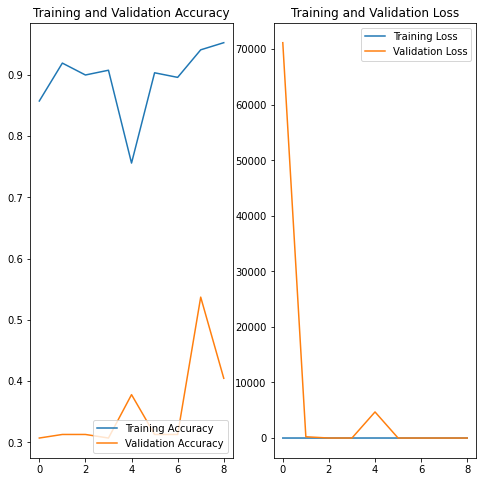

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
history.history

{'accuracy': [0.8575000166893005,
  0.9194444417953491,
  0.8999999761581421,
  0.9077777862548828,
  0.7561110854148865,
  0.9036111235618591,
  0.8961111307144165,
  0.9411110877990723,
  0.9527778029441833],
 'loss': [1.5909141302108765,
  0.3142862319946289,
  0.3714141547679901,
  1.0336205959320068,
  3.7808544635772705,
  0.32054078578948975,
  0.3308657705783844,
  0.1526607722043991,
  0.11804510653018951],
 'val_accuracy': [0.30692243576049805,
  0.3127606213092804,
  0.3127606213092804,
  0.30692243576049805,
  0.3778148591518402,
  0.3127606213092804,
  0.3127606213092804,
  0.5371142625808716,
  0.4045037627220154],
 'val_loss': [71174.3828125,
  227.7759552001953,
  1.0986024141311646,
  2.9185173511505127,
  4697.712890625,
  1.0972874164581299,
  1.1348605155944824,
  1.110383152961731,
  1.3072782754898071]}

## Load Mini Save Model

In [51]:
gdown.download('https://drive.google.com/uc?id=10ay5KvdWLk1f7ks74PQTsGkU94goR4Ss','model_cnn_mini.h5',quiet=False)

Downloading...
From: https://drive.google.com/uc?id=10ay5KvdWLk1f7ks74PQTsGkU94goR4Ss
To: /content/model_cnn_mini.h5
100%|██████████| 232M/232M [00:03<00:00, 66.8MB/s]


'model_cnn_mini.h5'

In [52]:
model = [[tf.keras.models.load_model('model_cnn_mini.h5'),150]]

## Load Save Model

In [25]:
gdown.download('https://drive.google.com/uc?id=1taE7ApcGf_uowaLgrmnHLOA1eMpBgKbE','model_vgg_v2.h5',quiet=False)
gdown.download('https://drive.google.com/uc?id=1-XbuNBvOWsf-cGw4Ki1ml08UDnOFdHom','model_cnn.h5',quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1taE7ApcGf_uowaLgrmnHLOA1eMpBgKbE
To: /content/model_vgg_v2.h5
100%|██████████| 178M/178M [00:01<00:00, 96.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-XbuNBvOWsf-cGw4Ki1ml08UDnOFdHom
To: /content/model_cnn.h5
100%|██████████| 232M/232M [00:03<00:00, 71.7MB/s]


'model_cnn.h5'

In [27]:
model = [[tf.keras.models.load_model('model_vgg_v2.h5'),224],[tf.keras.models.load_model('model_cnn.h5'),150]]

## Test with Test Data Set

In [22]:
class_labels = ["ripe", "medium","not ripe"]

In [47]:
def predict_img(img_path,models):
  scores = []
  for data in models:
    model = data[0]
    IMAGE_SIZE = data[1]
    img = tf.keras.preprocessing.image.load_img(
        img_path, target_size=(IMAGE_SIZE, IMAGE_SIZE)
    )
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = img_array / 255
    img_array = img_array.reshape(1,IMAGE_SIZE,IMAGE_SIZE,3)
    predictions = model.predict(img_array)
    scores.append(predictions[0])
  scores = np.array(scores)
  scores = np.mean(scores,axis=0)
  pred_class = class_labels[np.argmax(scores)]
  return pred_class

In [24]:
mature_df = pd.DataFrame(data=os.listdir(test_mature_dir),columns=["filename"])
mature_df["filename"] = test_mature_dir +'/'+ mature_df["filename"]
mature_df["actual"] = "ripe"
partial_df = pd.DataFrame(data=os.listdir(test_partially_mature_dir),columns=["filename"])
partial_df["filename"] = test_partially_mature_dir+'/' + partial_df["filename"]
partial_df["actual"] = "medium"
unmature_df = pd.DataFrame(data=os.listdir(test_unmature_dir),columns=["filename"])
unmature_df["filename"] = test_unmature_dir +'/'+ unmature_df["filename"]
unmature_df["actual"] = "not ripe"

df = pd.concat([mature_df,partial_df,unmature_df])
df

,filename,actual
0,./Datasets/test/Mature/mature_0931.jpg,ripe
1,./Datasets/test/Mature/mature_1476.png,ripe
2,./Datasets/test/Mature/mature_0174.jpg,ripe
3,./Datasets/test/Mature/mature_1722.png,ripe
4,./Datasets/test/Mature/mature_1446.png,ripe
...,...,...
374,./Datasets/test/Unmature/unmature_0359.jpg,not ripe
375,./Datasets/test/Unmature/unmature_1630.png,not ripe
376,./Datasets/test/Unmature/unmature_0840.jpg,not ripe
377,./Datasets/test/Unmature/unmature_0676.jpg,not ripe


In [53]:
confusion_matrix = np.zeros(9).reshape(3,3)
count = 0
true = 0
for i in df.itertuples():
  count+=1
  pred_class = predict_img(i[1],model)
  row = class_labels.index(pred_class)
  col = class_labels.index(i[2].lower())
  confusion_matrix[row][col] += 1
  if pred_class == i[2].lower():
    true+=1
  if count % 100 == 0:
    print("Done: ",true,count,"Accuracy:",true/count)
print("Accuracy: ", true/count)

Done:  76 100 Accuracy: 0.76
Done:  158 200 Accuracy: 0.79
Done:  243 300 Accuracy: 0.81
Done:  311 400 Accuracy: 0.7775
Done:  368 500 Accuracy: 0.736
Done:  420 600 Accuracy: 0.7
Done:  469 700 Accuracy: 0.67
Done:  530 800 Accuracy: 0.6625
Done:  608 900 Accuracy: 0.6755555555555556
Done:  687 1000 Accuracy: 0.687
Done:  764 1100 Accuracy: 0.6945454545454546
Done:  848 1200 Accuracy: 0.7066666666666667
Accuracy:  0.7065669160432253


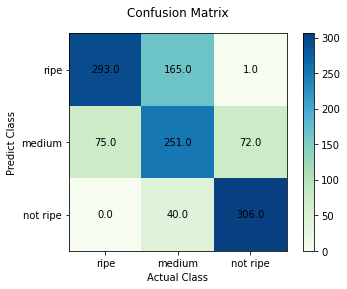

In [54]:
fig, ax = plt.subplots()
plt.title("Confusion Matrix")
heatmap = ax.matshow(confusion_matrix,cmap='GnBu')
plt.xlabel("Actual Class")
plt.ylabel("Predict Class")
plt.colorbar(heatmap)
ax.xaxis.set_ticks_position('bottom')
ax.set_xticklabels(["",*class_labels])
ax.set_yticklabels(["",*class_labels])
for (i, j), z in np.ndenumerate(confusion_matrix):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

In [ ]:
for i in ["/content/health-benefits-of-papaya_copy.jpeg","/content/unknown.png","/content/unknown (1).png","/content/unknown (2).png","/content/ripe.jpeg"]:
  img = tf.keras.preprocessing.image.load_img(
      i, target_size=(IMAGE_SIZE, IMAGE_SIZE)
  )
  img_array = tf.keras.preprocessing.image.img_to_array(img)
  img_array = img_array / 255
  img_array = img_array.reshape(1,IMAGE_SIZE,IMAGE_SIZE,3)
  predictions = model.predict(img_array)
  score = np.max(predictions[0])
  imgplot = plt.imshow(img)
  plt.show()
  print(
      "This image most likely belongs to {} with {}% confident level"
      .format(class_labels[np.argmax(predictions)],round(score * 100,4))
  )

# Save Model to Google Drive

In [ ]:
shutil.copy('model_resnet.h5','/content/gdrive/MyDrive/CSC340 AI/model_resnet_v2.h5')